In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from sklearn.decomposition import PCA
from sktime.datasets import load_osuleaf
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [2]:
xt = np.linspace(-2,2,200)
xt2 = np.linspace(-1,1,150)
xt3 = np.linspace(0,2,100)

In [3]:
def func1(x):
    term = 0*x + x
    return term

In [4]:
def func2(x):
    if x > -1/2 and x < 1/2:
        term = np.exp(3/((2*x)**2-1)) + x
    else:
        term = 0 + x
    
    return term

In [5]:
def noise(y):
    ri = random.randint(-1,1)
    term = y + 0.01*ri
    return term

In [6]:
y1 = [noise(func1(x)) for x in xt]
y2 = [noise(func2(x)) for x in xt2]
y2a = [x+0.1 for x in y2]
y3 = [noise(func1(x)) for x in xt3]
y3a = [x-0.1 for x in y3]

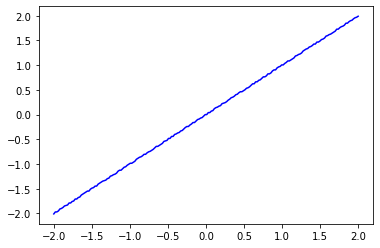

In [7]:
plt.plot(xt,y1,color='blue')
plt.show()

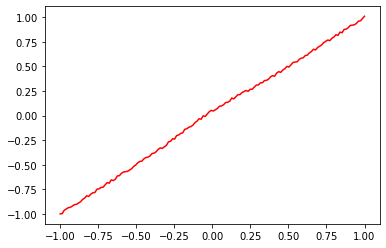

In [8]:
plt.plot(xt2,y2,color='red')
plt.show()

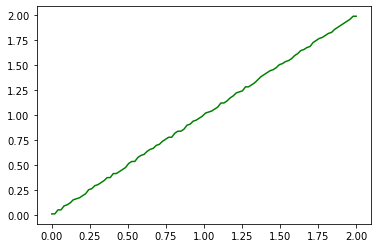

In [9]:
plt.plot(xt3,y3,color='green')
plt.show()

In [10]:
TS1 = np.array([[xt[i],y1[i]] for i in range(len(xt))])
TS2 = np.array([[xt[i],y2[i]] for i in range(len(xt2))])
TS3 = np.array([[xt[i],y3[i]] for i in range(len(xt3))])

In [11]:
TS1.shape

(200, 2)

In [12]:
def timeToShape(ts):
    #ell = ts.shape[0]
    tpi = 2*np.pi
    ep0 = ts[0][0]
    ep1 = ts[-1][0]
    m = np.amin(ts.transpose()[1])
    M = np.amax(ts.transpose()[1])
    
    def XtoTheta(x): #Get the temporal component as an angle in the x-y plane
        m = tpi/(ep1-ep0)
        b = -m*ep0
        term = m*x+b
        return term
    
    def YtoR(y): #Get the y value as the radius from the origin.
        r = (y + np.abs(m))/(M-m)
        return r
    
    def PtoC(p): #After converting to (theta,r), convert to (x,y) for later plotting
        x = p[1]*np.cos(p[0])
        y = p[1]*np.sin(p[0])
        
        return [x,y]
    
    mL1 = np.array([[XtoTheta(p[0]), YtoR(p[1])] for p in ts])
    mL2 = np.array([PtoC(p) for p in mL1])
    return [mL1, mL2]

In [13]:
s1 = timeToShape(TS1)
s2 = timeToShape(TS2)
s3 = timeToShape(TS3)
s1t = s1[1].transpose()
s2t = s2[1].transpose()
s3t = s3[1].transpose()

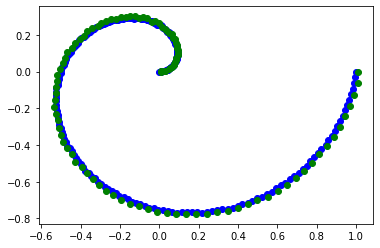

In [14]:
plt.scatter(s1t[0],s1t[1],color="blue")
plt.scatter(s3t[0],s3t[1],color="green")
plt.show()

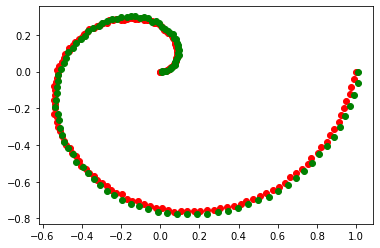

In [15]:
plt.scatter(s2t[0],s2t[1],color="red")
plt.scatter(s3t[0],s3t[1],color="green")
plt.show()

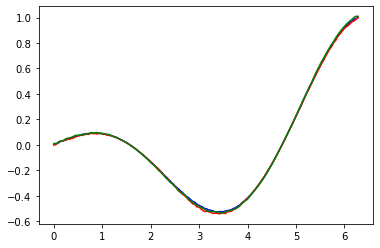

In [16]:
plt.plot(s1[0].transpose()[0],s1t[0],color="Blue")
plt.plot(s2[0].transpose()[0],s2t[0],color="Red")
plt.plot(s3[0].transpose()[0],s3t[0],color="Green")
plt.show()

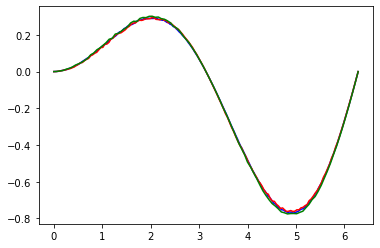

In [17]:
plt.plot(s1[0].transpose()[0],s1t[1],color="Blue")
plt.plot(s2[0].transpose()[0],s2t[1],color="Red")
plt.plot(s3[0].transpose()[0],s3t[1],color="Green")
plt.show()

In [18]:
def myfunc(x,a,b,c,d,e,f,g,h,i,j):
    return a*x**9+b*x**8+c*x**7+d*x**6+e*x**5+f*x**4+g*x**3+h*x**2+i*x**1+j

In [19]:
Xpopt1, Xpcov1 = curve_fit(myfunc, s1[0].transpose()[0],s1t[0])
Xpopt2, Xpcov2 = curve_fit(myfunc, s2[0].transpose()[0],s2t[0])
Xpopt3, Xpcov3 = curve_fit(myfunc, s3[0].transpose()[0],s3t[0])

Ypopt1, Ypcov1 = curve_fit(myfunc, s1[0].transpose()[0],s1t[1])
Ypopt2, Ypcov2 = curve_fit(myfunc, s2[0].transpose()[0],s2t[1])
Ypopt3, Ypcov3 = curve_fit(myfunc, s3[0].transpose()[0],s3t[1])

In [20]:
X1 = lambda x: myfunc(x, *Xpopt1)
X2 = lambda x: myfunc(x, *Xpopt2)
X3 = lambda x: myfunc(x, *Xpopt3)

Y1 = lambda x: myfunc(x, *Ypopt1)
Y2 = lambda x: myfunc(x, *Ypopt2)
Y3 = lambda x: myfunc(x, *Ypopt3)

In [21]:
def IP(r1,r2):
    Dfunc = lambda x: r1[0](x)*r2[0](x) + r1[1](x)*r2[1](x)
    term = integrate.quad(Dfunc,0,2*np.pi)
    return term[0]

In [22]:
def angle(r1,r2):
    term = IP(r1,r2)/np.sqrt(IP(r1,r1)*IP(r2,r2))
    theta = np.arccos(term)
    return theta

In [23]:
IP([X1,Y1],[X2,Y2])

2.108098303070267

In [24]:
angle([X1,Y1],[X1,Y1])

0.0

In [25]:
angle([X1,Y1],[X3,Y3])

0.003027777462835812

In [26]:
angle([X2,Y2],[X3,Y3])

0.013789929855315278

In [27]:
X, y = load_osuleaf(return_X_y=True)
#tscv =  TimeSeriesSplit(n_splits = 2) 

In [28]:
Xd = X.to_numpy()

In [29]:
def timeToShape2(ts):
    #ell = ts.shape[0]
    tpi = 2*np.pi
    ep0 = ts[0][0]
    ep1 = ts[-1][0]
    m = np.amin(ts.transpose()[1])
    M = np.amax(ts.transpose()[1])
    
    def XtoTheta(x): #Get the temporal component as an angle in the x-y plane
        m = tpi/(ep1-ep0)
        b = -m*ep0
        term = m*x+b
        return term
    
    def YtoR(y): #Get the y value as the radius from the origin.
        r = (y + np.abs(m))/(M-m)
        return r
    
    def PtoC(p): #After converting to (theta,r), convert to (x,y) for later plotting
        x = p[1]*np.cos(p[0])
        y = p[1]*np.sin(p[0])
        
        return [x,y]
    
    def toPCA(A):
        pca = PCA(n_components=2)
        B = np.array(pca.fit_transform(A))
        return B
    
    mL1 = np.array([[XtoTheta(p[0]), YtoR(p[1])] for p in ts])
    mL2 = np.array([PtoC(p) for p in mL1])
    mL3 = toPCA(mL2)
    return [mL1, mL2, mL3]

In [30]:
def dtoT(d):
    li = [[i,d[i]] for i in range(len(d))]
    return np.array(li)

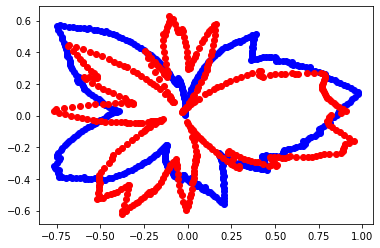

In [31]:
testthing1 = timeToShape2(dtoT(Xd[0][0]))
testthing2 = timeToShape2(dtoT(Xd[1][0]))
tt1 = testthing1[2].transpose()
tt2 = testthing2[2].transpose()
plt.scatter(tt1[0],tt1[1],color="Blue")
plt.scatter(tt2[0],tt2[1],color="Red")
plt.show()

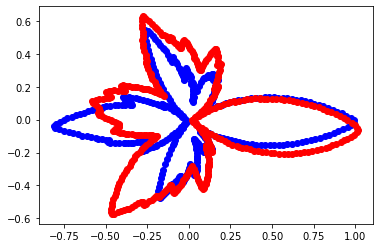

In [32]:
testthing1 = timeToShape2(dtoT(Xd[4][0]))
testthing2 = timeToShape2(dtoT(Xd[5][0]))
tt1 = testthing1[2].transpose()
tt2 = testthing2[2].transpose()
plt.scatter(tt1[0],tt1[1],color="Blue")
plt.scatter(tt2[0],tt2[1],color="Red")
plt.show()

In [33]:
y[4]

'3'

In [34]:
y[5]

'3'

In [35]:
def getSim(t1,t2):
    #First get the parametric equations for each shape.
    testthing1 = timeToShape2(t1)
    testthing2 = timeToShape2(t2)
    
    t1 = testthing1[0].transpose()[0]
    t2 = testthing2[0].transpose()[0]
    x1 = testthing1[2].transpose()[0]
    y1 = testthing1[2].transpose()[1]
    x2 = testthing2[2].transpose()[0]
    y2 = testthing2[2].transpose()[1]
    
    Xpopt1, Xpcov1 = curve_fit(myfunc, t1, x1)
    Ypopt1, Ypcov1 = curve_fit(myfunc, t1, y1)
    Xpopt2, Xpcov2 = curve_fit(myfunc, t2, x2)
    Ypopt2, Ypcov2 = curve_fit(myfunc, t2, y2)
    
    X1 = lambda x: myfunc(x, *Xpopt1)
    X2 = lambda x: myfunc(x, *Xpopt2)
    Y1 = lambda x: myfunc(x, *Ypopt1)
    Y2 = lambda x: myfunc(x, *Ypopt2)
    
    A = angle([X1,Y1],[X2,Y2])
    return A

In [36]:
getSim(dtoT(Xd[4][0]),dtoT(Xd[5][0]))

1.8490426360192065

In [37]:
getSim(dtoT(Xd[0][0]),dtoT(Xd[1][0]))

1.855854086203512

In [38]:
testsubjects = [Xd[i][0] for i in range(len(Xd))]

In [39]:
sims3 = [[s,getSim(dtoT(testsubjects[s]),dtoT(testsubjects[3]))] for s in range(len(testsubjects))]

In [40]:
ssim3 = sorted(sims3, key=lambda x: (x[1],x[0]), reverse=False)

In [41]:
[y[ssim3[i][0]] for i in range(5)]

['1', '1', '5', '1', '3']